In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 


In [3]:
df=pd.read_csv('real_estate_texas_500_2024.csv')
df.head()

,url,status,id,listPrice,baths,baths_full,baths_full_calc,beds,sqft,stories,sub_type,text,type,year_built
0,https://www.realtor.com/realestateandhomes-det...,for_sale,9773941616,240000.0,2,2.0,2.0,3.0,1190.0,1.0,NaN,Welcome home to your peaceful retreat nestled ...,single_family,2018.0
1,https://www.realtor.com/realestateandhomes-det...,for_sale,9224923922,379900.0,4,3.0,3.0,4.0,2033.0,1.0,NaN,"Beautiful country home on 0.85 fenced acres, m...",single_family,2002.0
2,https://www.realtor.com/realestateandhomes-det...,for_sale,9840661824,370000.0,2,2.0,2.0,4.0,2062.0,1.0,NaN,PRICED TO SELL CORNER LOT HAS A STORM SHELTER ...,single_family,2012.0
3,https://www.realtor.com/realestateandhomes-det...,for_sale,7338317229,444000.0,4,3.0,3.0,5.0,3705.0,2.0,NaN,Come check out country living in the city! Are...,single_family,1985.0
4,https://www.realtor.com/realestateandhomes-det...,for_sale,7285845528,569000.0,2,2.0,2.0,3.0,3282.0,2.0,NaN,Welcome to your dream retreat! Nestled on over...,single_family,1981.0


In [43]:
df.describe

<bound method NDFrame.describe of                                                    url    status          id  \
0    https://www.realtor.com/realestateandhomes-det...  for_sale  9773941616   
1    https://www.realtor.com/realestateandhomes-det...  for_sale  9224923922   
2    https://www.realtor.com/realestateandhomes-det...  for_sale  9840661824   
3    https://www.realtor.com/realestateandhomes-det...  for_sale  7338317229   
4    https://www.realtor.com/realestateandhomes-det...  for_sale  7285845528   
..                                                 ...       ...         ...   
496  https://www.realtor.com/realestateandhomes-det...  for_sale  9697052071   
497  https://www.realtor.com/realestateandhomes-det...  for_sale  8417528805   
498  https://www.realtor.com/realestateandhomes-det...  for_sale  9910094492   
499  https://www.realtor.com/realestateandhomes-det...  for_sale  9569395776   
500  https://www.realtor.com/realestateandhomes-det...  for_sale  9434894519   

     

In [44]:
df.columns

Index(['url', 'status', 'id', 'listPrice', 'baths', 'baths_full',
       'baths_full_calc', 'beds', 'sqft', 'stories', 'sub_type', 'text',
       'type', 'year_built'],
      dtype='object')

In [45]:
df.shape

(501, 14)

In [46]:
missing_values_count=df.isnull().sum()
print(missing_values_count)

url                  0
status               0
id                   0
listPrice            2
baths                0
baths_full          65
baths_full_calc     65
beds                61
sqft                63
stories            110
sub_type           491
text                 6
type                 0
year_built         212
dtype: int64


In [47]:
df['listPrice'] = df['listPrice'].fillna(df['listPrice'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              501 non-null    object 
 1   status           501 non-null    object 
 2   id               501 non-null    int64  
 3   listPrice        501 non-null    float64
 4   baths            501 non-null    int64  
 5   baths_full       436 non-null    float64
 6   baths_full_calc  436 non-null    float64
 7   beds             440 non-null    float64
 8   sqft             438 non-null    float64
 9   stories          391 non-null    float64
 10  sub_type         10 non-null     object 
 11  text             495 non-null    object 
 12  type             501 non-null    object 
 13  year_built       289 non-null    float64
dtypes: float64(7), int64(2), object(5)
memory usage: 54.9+ KB


<function matplotlib.pyplot.show(close=None, block=None)>

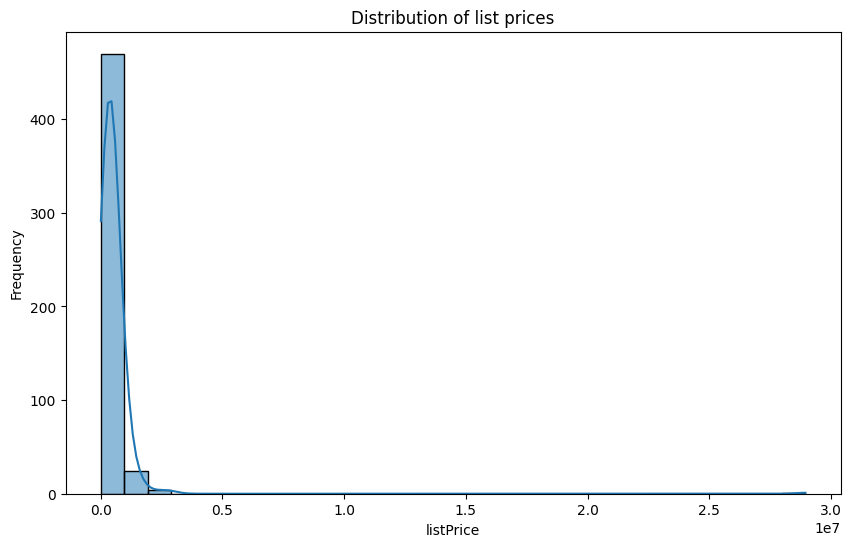

In [4]:
plt.figure(figsize = (10,6))
sns.histplot(df['listPrice'], bins=30,kde=True)
plt.title("Distribution of list prices")
plt.xlabel('listPrice')
plt.ylabel("Frequency")
plt.show

In [49]:
price_dist = df['listPrice'].describe()
price_dist

count    5.010000e+02
mean     5.106686e+05
std      1.318409e+06
min      1.000000e+04
25%      2.650000e+05
50%      3.749900e+05
75%      5.390000e+05
max      2.895000e+07
Name: listPrice, dtype: float64

,type,count
0,single_family,402
1,land,49
2,farm,26
3,mobile,12
4,townhomes,6
5,condos,5
6,multi_family,1


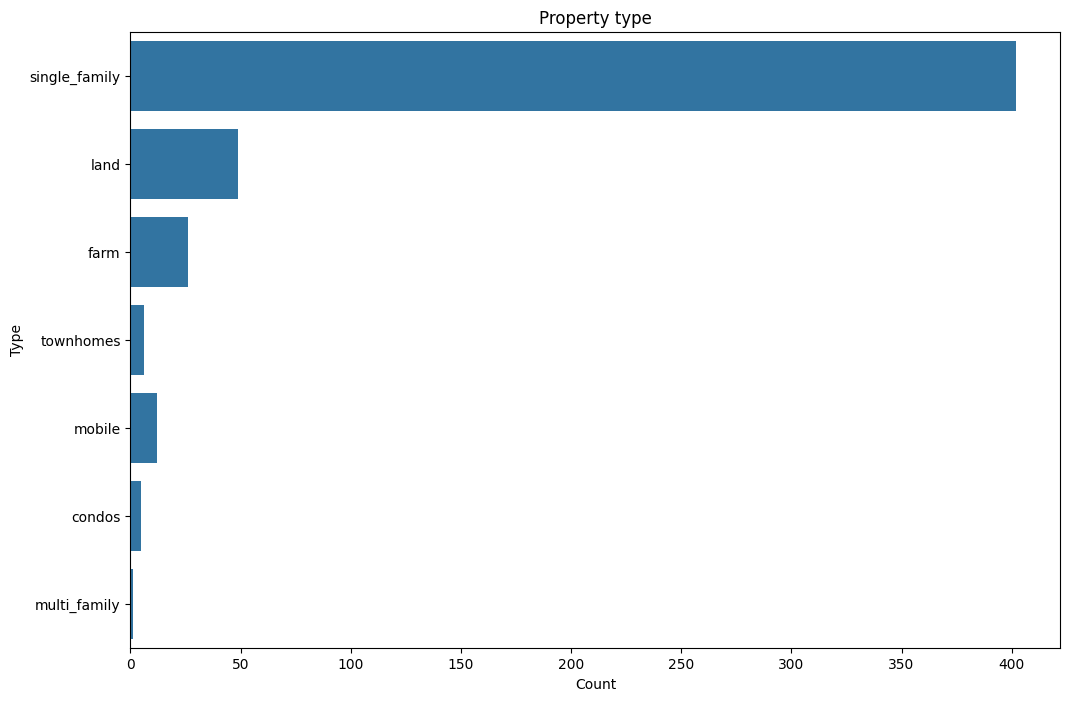

In [50]:
plt.figure(figsize = (12,8))
sns.countplot(y = 'type', data=df, palette=None) 
plt.title("Property type")
plt.xlabel('Count')
plt.ylabel("Type")
plt.show

type_counts=df['type'].value_counts().reset_index()
type_counts

In [51]:
yearly_summary = df.groupby('year_built').agg(av_listPrice=('listPrice','mean'), av_sq_footage=('sqft','mean')).reset_index()

yearly_summary['av_listPrice']=yearly_summary['av_listPrice'].round(2)
yearly_summary

,year_built,av_listPrice,av_sq_footage
0,1891.0,800000.00,1634.000000
1,1895.0,499800.00,1752.000000
2,1930.0,280000.00,2448.000000
3,1938.0,1349000.00,2590.000000
4,1939.0,519900.00,3493.000000
...,...,...,...
72,2020.0,639265.38,2598.923077
73,2021.0,525064.14,2558.785714
74,2022.0,603420.62,2389.562500
75,2023.0,508427.48,2039.538462


[[2.40000000e+05]
 [3.79900000e+05]
 [3.70000000e+05]
 [4.44000000e+05]
 [5.69000000e+05]
 [8.75000000e+05]
 [2.14500000e+05]
 [1.84900000e+05]
 [3.74900000e+05]
 [1.99900000e+05]
 [2.07000000e+05]
 [4.98000000e+05]
 [2.09900000e+05]
 [2.87500000e+05]
 [1.89900000e+05]
 [1.50000000e+05]
 [9.00000000e+04]
 [2.09000000e+05]
 [1.45000000e+05]
 [2.69950000e+05]
 [5.99000000e+05]
 [5.79000000e+05]
 [2.50000000e+05]
 [2.36500000e+05]
 [1.35000000e+05]
 [2.89500000e+07]
 [6.75000000e+05]
 [2.80000000e+05]
 [6.35000000e+05]
 [7.12500000e+05]
 [3.95000000e+05]
 [2.40000000e+05]
 [5.19900000e+05]
 [5.75000000e+05]
 [9.50000000e+04]
 [5.30000000e+05]
 [2.29900000e+05]
 [1.15000000e+05]
 [4.25000000e+05]
 [1.90000000e+04]
 [5.75000000e+05]
 [1.69900000e+05]
 [4.98000000e+05]
 [3.40000000e+05]
 [2.79900000e+05]
 [6.69000000e+05]
 [2.99900000e+05]
 [3.00000000e+05]
 [2.59900000e+05]
 [5.39000000e+05]
 [5.19900000e+05]
 [6.00000000e+04]
 [6.10000000e+05]
 [1.79500000e+05]
 [1.54900000e+05]
 [2.699000

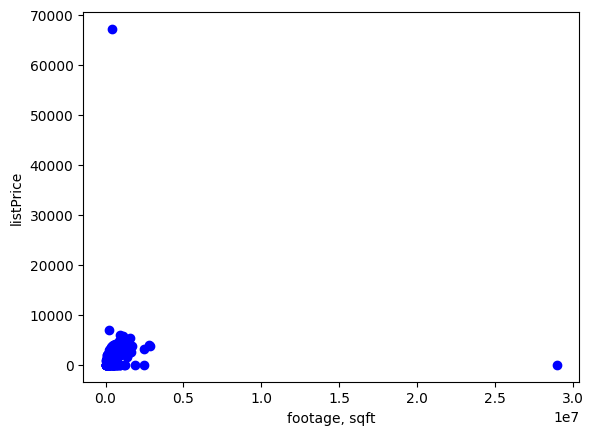

In [57]:
from sklearn.linear_model import LinearRegression
df['sqft']=df['sqft'].fillna(0)
x=df.iloc[:,3:4].values
y=df.iloc[:,-6:-5].values

print(x)
print(y)

plt.scatter(x,y,color='b')
plt.xlabel('footage, sqft')
plt.ylabel('listPrice')
plt.show()

In [58]:
regr_model=LinearRegression()
regr_model.fit(x,y)

LinearRegression()

In [68]:
y_pred = regr_model.predict(x)


In [69]:
df['beds']=df['beds'].fillna(0)
X=df[['sqft','beds']]
y=df['listPrice']
mult_regr = LinearRegression()
mult_regr.fit(X,y)

LinearRegression()

In [ ]:
predict_mult = mult_regr.predict([[1500,2]])